In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install kaggle

In [5]:
import os

os.environ['KAGGLE_USERNAME'] = "your_username"
os.environ['KAGGLE_KEY'] = "your_api_key"

In [8]:
!kaggle datasets download -d tawfikelmetwally/advertising-dataset

Dataset URL: https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/2.26k [00:00<?, ?B/s]
100% 2.26k/2.26k [00:00<00:00, 9.72MB/s]


In [9]:
!unzip advertising-dataset.zip

Archive:  advertising-dataset.zip
  inflating: Advertising.csv         


In [11]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


### For this project, I"m going to use one predictor which is TV Advertising Budget to Sales

In [16]:
X = df[["TV"]]
y = df[["Sales"]]

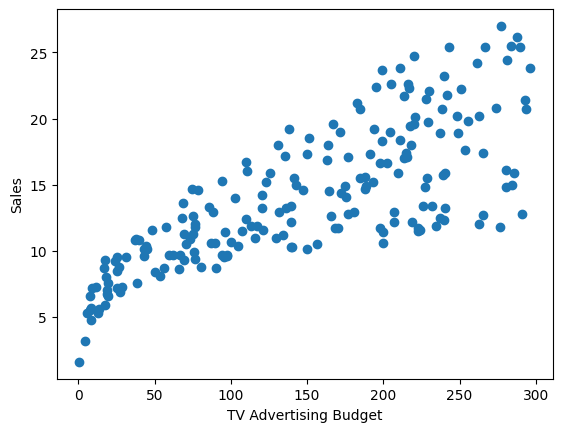

In [18]:
plt.scatter(X,y)
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.show()

### The scatter plot shows a positive linear relationship between TV advertising spending and sales, suggesting that a linear regression model is appropriate.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope", slope)
print("Intercept", intercept)

Slope [0.04652973]
Intercept [7.11963843]


### The slope represents the expected increase in sales for each additional unit spent on TV advertising.

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 10.204654118800956
R² Score: 0.6766954295627076


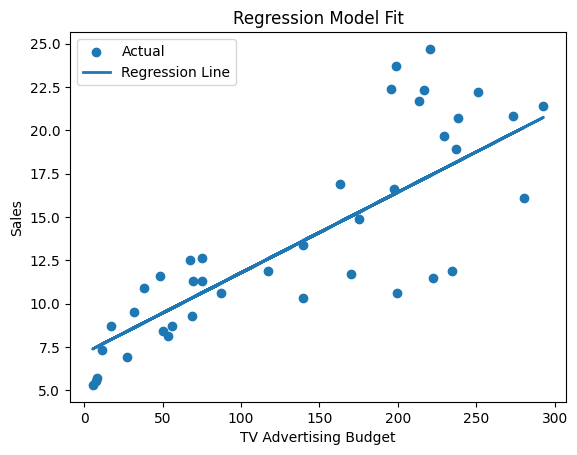

In [24]:
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, linewidth=2, label="Regression Line")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("Regression Model Fit")
plt.legend()
plt.show()

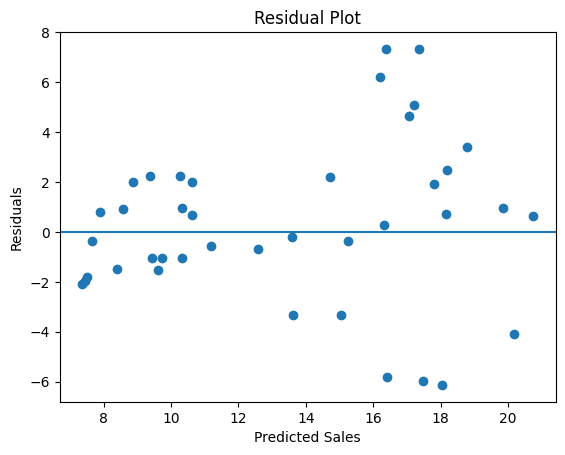

In [25]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [26]:
results = X_test.copy()
results["Actual_Sales"] = y_test.values
results["Predicted_Sales"] = y_pred

results.head(10)

,TV,Actual_Sales,Predicted_Sales
95,163.3,16.9,14.717944
15,195.4,22.4,16.211548
30,292.9,21.4,20.748197
158,11.7,7.3,7.664036
128,220.3,24.7,17.370139
115,75.1,12.6,10.614021
69,216.8,22.3,17.207285
170,50.0,8.4,9.446125
174,222.4,11.5,17.467851
45,175.1,14.9,15.266995


In [27]:
results["Error"] = results["Actual_Sales"] - results["Predicted_Sales"]
results["Absolute_Error"] = np.abs(results["Error"])

results.describe()

,TV,Actual_Sales,Predicted_Sales,Error,Absolute_Error
count,40.000000,40.00000,40.000000,40.000000,40.000000
mean,135.135000,13.71250,13.407434,0.305066,2.444420
std,91.512814,5.68972,4.258067,3.220382,2.082766
min,5.400000,5.30000,7.370899,-6.130861,0.201230
25%,52.625000,9.45000,9.568266,-1.501649,0.884508
50%,139.400000,11.80000,13.605883,0.468944,1.930547
75%,217.675000,19.10000,17.247998,2.054688,3.355762
max,292.900000,24.70000,20.748197,7.329861,7.329861


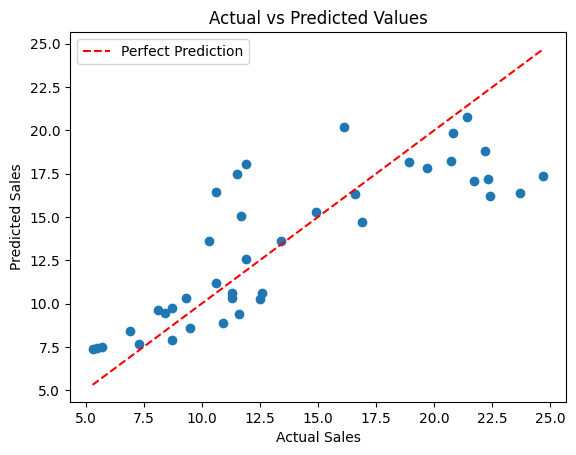

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


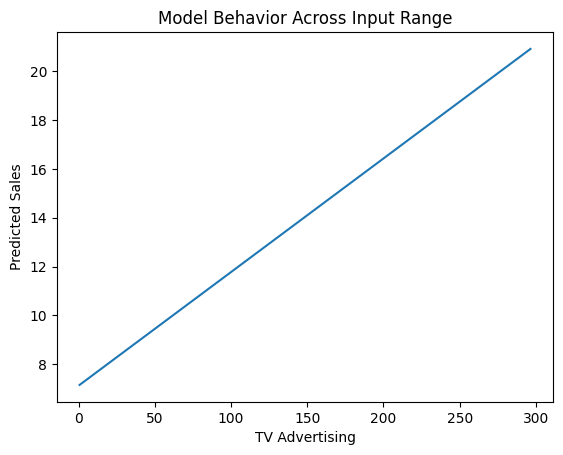

In [35]:
tv_range = np.linspace(df["TV"].min(), df["TV"].max(), 100)
predictions = model.predict(tv_range.reshape(-1,1))

plt.plot(tv_range, predictions)
plt.xlabel("TV Advertising")
plt.ylabel("Predicted Sales")
plt.title("Model Behavior Across Input Range")
plt.show()
